In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,confusion_matrix,precision_recall_curve
from sklearn import tree

In [2]:
x = pd.read_csv(r'C:/Users/Public/Indian Food/indian_food.csv')

In [3]:
x.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [4]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [5]:
x.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [6]:
x.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [7]:
x['region'].value_counts(dropna=False)

West          74
South         59
North         49
East          31
North East    25
-1            13
Central        3
NaN            1
Name: region, dtype: int64

In [8]:
x.region.unique()

array(['East', 'West', 'North', '-1', 'North East', 'South', 'Central',
       nan], dtype=object)

In [9]:
x.loc[x['region']=='-1']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,-1,-1
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,-1,-1
10,Laddu,"Gram flour, ghee, sugar",vegetarian,10,40,sweet,dessert,-1,-1
12,Nankhatai,"Refined flour, besan, ghee, powdered sugar, yo...",vegetarian,20,30,sweet,dessert,-1,-1
94,Khichdi,"Moong dal, green peas, ginger, tomato, green c...",vegetarian,40,20,spicy,main course,-1,-1
96,Kulfi falooda,"Rose syrup, falooda sev, mixed nuts, saffron, ...",vegetarian,45,25,sweet,dessert,-1,-1
98,Lauki ki subji,"Bottle gourd, coconut oil, garam masala, ginge...",vegetarian,10,20,spicy,main course,-1,-1
109,Pani puri,"Kala chana, mashed potato, boondi, sev, lemon",vegetarian,15,2,spicy,snack,-1,-1
111,Papad,"Urad dal, sev, lemon juice, chopped tomatoes",vegetarian,5,5,spicy,snack,-1,-1
117,Samosa,"Potatoes, green peas, garam masala, ginger, dough",vegetarian,30,30,spicy,snack,-1,-1


In [10]:
x['region']=x['region'].replace('-1',"Unknown")

In [11]:
x.fillna(value= '-1', inplace = True)

In [12]:
x.loc[x['region']=='-1']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
110,Panjeeri,"Whole wheat flour, musk melon seeds, poppy see...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,-1


In [13]:
x.loc[x['state']=='Uttar Pradesh']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
13,Petha,"Firm white pumpkin, sugar, kitchen lime, alum ...",vegetarian,10,30,sweet,dessert,Uttar Pradesh,North
15,Rabri,"Condensed milk, sugar, spices, nuts",vegetarian,10,45,sweet,dessert,Uttar Pradesh,North
18,Sohan halwa,"Corn flour, ghee, dry fruits",vegetarian,10,60,sweet,dessert,Uttar Pradesh,North
90,Kachori,"Moong dal, rava, garam masala, dough, fennel s...",vegetarian,30,60,spicy,snack,Uttar Pradesh,North
95,Kofta,"Paneer, potato, cream, corn flour, garam masala",vegetarian,20,40,spicy,main course,Uttar Pradesh,North
97,Lauki ke kofte,"Bottle gourd, garam masala powder, gram flour,...",vegetarian,20,40,spicy,main course,Uttar Pradesh,North
105,Navrattan korma,"Green beans, potatoes, khus khus, low fat, gar...",vegetarian,25,40,spicy,main course,Uttar Pradesh,North
110,Panjeeri,"Whole wheat flour, musk melon seeds, poppy see...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,-1


In [14]:
x.loc[x['name']=='Panjeeri','region'] = x.loc[x['name']=='Panjeeri','region'].replace('-1','North')

In [15]:
x.region.unique()

array(['East', 'West', 'North', 'Unknown', 'North East', 'South',
       'Central'], dtype=object)

In [16]:
x.region.value_counts()

West          74
South         59
North         50
East          31
North East    25
Unknown       13
Central        3
Name: region, dtype: int64

In [17]:
x.state.unique()

array(['West Bengal', 'Rajasthan', 'Punjab', 'Uttar Pradesh', '-1',
       'Odisha', 'Maharashtra', 'Uttarakhand', 'Assam', 'Bihar',
       'Andhra Pradesh', 'Karnataka', 'Telangana', 'Kerala', 'Tamil Nadu',
       'Gujarat', 'Tripura', 'Manipur', 'Nagaland', 'NCT of Delhi',
       'Jammu & Kashmir', 'Chhattisgarh', 'Haryana', 'Madhya Pradesh',
       'Goa'], dtype=object)

In [18]:
x.loc[x['state']=='-1']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,-1,Unknown
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,-1,Unknown
10,Laddu,"Gram flour, ghee, sugar",vegetarian,10,40,sweet,dessert,-1,Unknown
12,Nankhatai,"Refined flour, besan, ghee, powdered sugar, yo...",vegetarian,20,30,sweet,dessert,-1,Unknown
94,Khichdi,"Moong dal, green peas, ginger, tomato, green c...",vegetarian,40,20,spicy,main course,-1,Unknown
96,Kulfi falooda,"Rose syrup, falooda sev, mixed nuts, saffron, ...",vegetarian,45,25,sweet,dessert,-1,Unknown
98,Lauki ki subji,"Bottle gourd, coconut oil, garam masala, ginge...",vegetarian,10,20,spicy,main course,-1,Unknown
109,Pani puri,"Kala chana, mashed potato, boondi, sev, lemon",vegetarian,15,2,spicy,snack,-1,Unknown
111,Papad,"Urad dal, sev, lemon juice, chopped tomatoes",vegetarian,5,5,spicy,snack,-1,Unknown
115,Rajma chaval,"Red kidney beans, garam masala powder, ginger,...",vegetarian,15,90,spicy,main course,-1,North


In [19]:
x['state']=x['state'].replace('-1',"Unknown")

In [20]:
x.state.unique()

array(['West Bengal', 'Rajasthan', 'Punjab', 'Uttar Pradesh', 'Unknown',
       'Odisha', 'Maharashtra', 'Uttarakhand', 'Assam', 'Bihar',
       'Andhra Pradesh', 'Karnataka', 'Telangana', 'Kerala', 'Tamil Nadu',
       'Gujarat', 'Tripura', 'Manipur', 'Nagaland', 'NCT of Delhi',
       'Jammu & Kashmir', 'Chhattisgarh', 'Haryana', 'Madhya Pradesh',
       'Goa'], dtype=object)

In [21]:
x.state.value_counts()

Gujarat            35
Punjab             32
Maharashtra        30
Unknown            24
West Bengal        24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Odisha              7
Rajasthan           6
Karnataka           6
Telangana           5
Bihar               3
Goa                 3
Madhya Pradesh      2
Manipur             2
Jammu & Kashmir     2
NCT of Delhi        1
Tripura             1
Nagaland            1
Haryana             1
Uttarakhand         1
Chhattisgarh        1
Name: state, dtype: int64

In [22]:
x.flavor_profile.unique()

array(['sweet', 'spicy', 'bitter', '-1', 'sour'], dtype=object)

In [23]:
x.flavor_profile.value_counts()

spicy     133
sweet      88
-1         29
bitter      4
sour        1
Name: flavor_profile, dtype: int64

In [24]:
x.loc[x['flavor_profile']=='-1']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
78,Chapati,"Whole wheat flour, olive oil, hot water, all p...",vegetarian,10,10,-1,main course,Maharashtra,West
104,Naan,"Whole wheat flour, honey, butter, garlic",vegetarian,60,30,-1,main course,Punjab,North
116,Rongi,"Garam masala powder, tomato, kasuri methi, cin...",vegetarian,10,30,-1,main course,Punjab,North
131,Kanji,"Carrot, yellow mustard, red chilli, black salt",vegetarian,10,45,-1,snack,Kerala,South
145,Pachadi,"Coconut oil, cucumber, curd, curry leaves, mus...",vegetarian,10,25,-1,main course,Unknown,South
146,Paniyaram,"Yogurt, ginger, curry leaves, baking soda, gre...",vegetarian,10,20,-1,main course,Tamil Nadu,South
150,Paruppu sadam,"Arhar dal, sambar powder, tomato, curry leaves...",vegetarian,10,20,-1,main course,Tamil Nadu,South
153,Puli sadam,"Urad dal, lemon, tamarind, cooked rice, curry ...",vegetarian,10,20,-1,main course,Tamil Nadu,South
155,Puttu,"Brown rice flour, sugar, grated coconut",vegetarian,495,40,-1,main course,Kerala,South
157,Sandige,"Thin rice flakes, black sesame seeds, curry le...",vegetarian,120,60,-1,main course,Karnataka,South


In [25]:
x.loc[x['name']=='Chapati', 'flavor_profile'] = x.loc[x['name']=='Chapati', 'flavor_profile'].replace('-1','plain')
x.loc[x['name']=='Naan', 'flavor_profile'] = x.loc[x['name']=='Naan', 'flavor_profile'].replace('-1','plain')
x.loc[x['name']=='Rongi', 'flavor_profile'] = x.loc[x['name']=='Rongi', 'flavor_profile'].replace('-1','spicy')
x.loc[x['name']=='Dahi vada', 'flavor_profile'] = x.loc[x['name']=='Dahi vada', 'flavor_profile'].replace('-1','plain')
x.loc[x['name']=='Kanji', 'flavor_profile'] = x.loc[x['name']=='Kanji', 'flavor_profile'].replace('-1','sour')
x.loc[x['name']=='Pachadi', 'flavor_profile'] = x.loc[x['name']=='Pachadi', 'flavor_profile'].replace('-1','sweet')
x.loc[x['name']=='Paniyaram', 'flavor_profile'] = x.loc[x['name']=='Paniyaram', 'flavor_profile'].replace('-1','plain')
x.loc[x['name']=='Paruppu sadam', 'flavor_profile'] = x.loc[x['name']=='Paruppu sadam', 'flavor_profile'].replace('-1','spicy')
x.loc[x['name']=='Puli sadam', 'flavor_profile'] = x.loc[x['name']=='Puli sadam', 'flavor_profile'].replace('-1','sour')
x.loc[x['name']=='Puttu', 'flavor_profile'] = x.loc[x['name']=='Puttu', 'flavor_profile'].replace('-1','spicy')
x.loc[x['name']=='Sandige', 'flavor_profile'] = x.loc[x['name']=='Sandige', 'flavor_profile'].replace('-1','plain')
x.loc[x['name']=='Sevai', 'flavor_profile'] = x.loc[x['name']=='Sevai', 'flavor_profile'].replace('-1','spicy')
x.loc[x['name']=='Thayir sadam', 'flavor_profile'] = x.loc[x['name']=='Thayir sadam', 'flavor_profile'].replace('-1','plain')
x.loc[x['name']=='Theeyal', 'flavor_profile'] = x.loc[x['name']=='Theeyal', 'flavor_profile'].replace('-1','spicy')
x.loc[x['name']=='Bhakri', 'flavor_profile'] = x.loc[x['name']=='Bhakri', 'flavor_profile'].replace('-1','plain')
x.loc[x['name']=='Copra paak', 'flavor_profile'] = x.loc[x['name']=='Copra paak', 'flavor_profile'].replace('-1','sweet')
x.loc[x['name']=='Dalithoy', 'flavor_profile'] = x.loc[x['name']=='Dalithoy', 'flavor_profile'].replace('-1','spicy')
x.loc[x['name']=='Kansar', 'flavor_profile'] = x.loc[x['name']=='Kansar', 'flavor_profile'].replace('-1','sweet')
x.loc[x['name']=='Farsi Puri', 'flavor_profile'] = x.loc[x['name']=='Farsi Puri', 'flavor_profile'].replace('-1','plain')
x.loc[x['name']=='Khar', 'flavor_profile'] = x.loc[x['name']=='Khar', 'flavor_profile'].replace('-1','sweet')
x.loc[x['name']=='Luchi', 'flavor_profile'] = x.loc[x['name']=='Luchi', 'flavor_profile'].replace('-1','plain')
x.loc[x['name']=='Bengena Pitika', 'flavor_profile'] = x.loc[x['name']=='Bengena Pitika', 'flavor_profile'].replace('-1','spicy')
x.loc[x['name']=='Bilahi Maas', 'flavor_profile'] = x.loc[x['name']=='Bilahi Maas', 'flavor_profile'].replace('-1','sour')
x.loc[x['name']=='Black rice', 'flavor_profile'] = x.loc[x['name']=='Black rice', 'flavor_profile'].replace('-1','plain')
x.loc[x['name']=='Brown Rice', 'flavor_profile'] = x.loc[x['name']=='Brown Rice', 'flavor_profile'].replace('-1','plain')
x.loc[x['name']=='Chingri Bhape', 'flavor_profile'] = x.loc[x['name']=='Chingri Bhape', 'flavor_profile'].replace('-1','spicy')
x.loc[x['name']=='Pakhala', 'flavor_profile'] = x.loc[x['name']=='Pakhala', 'flavor_profile'].replace('-1','plain')
x.loc[x['name']=='Pani Pitha', 'flavor_profile'] = x.loc[x['name']=='Pani Pitha', 'flavor_profile'].replace('-1','sweet')
x.loc[x['name']=='Red Rice', 'flavor_profile'] = x.loc[x['name']=='Red Rice', 'flavor_profile'].replace('-1','plain')

In [26]:
x.loc[x['flavor_profile']=='-1']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region


In [27]:
x.flavor_profile.value_counts()

spicy     141
sweet      93
plain      13
bitter      4
sour        4
Name: flavor_profile, dtype: int64

In [28]:
x.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [29]:
x.cook_time.value_counts()

 30     59
 20     42
-1      28
 40     27
 60     22
 45     15
 25     13
 50     10
 35      9
 10      7
 90      7
 15      5
 5       3
 120     3
 2       1
 6       1
 55      1
 75      1
 720     1
Name: cook_time, dtype: int64

In [30]:
x["cook_time"].mean()

34.529411764705884

In [31]:
x["cook_time"]=x["cook_time"].replace(-1,35)

In [32]:
x.cook_time.value_counts()

30     59
20     42
35     37
40     27
60     22
45     15
25     13
50     10
10      7
90      7
15      5
120     3
5       3
75      1
2       1
55      1
6       1
720     1
Name: cook_time, dtype: int64

In [33]:
x.prep_time.value_counts()

 10     98
 20     40
-1      30
 15     22
 5      16
 30     12
 25      5
 45      5
 120     5
 240     4
 360     3
 40      3
 180     2
 60      2
 80      1
 70      1
 150     1
 35      1
 480     1
 495     1
 12      1
 500     1
Name: prep_time, dtype: int64

In [34]:
x["prep_time"].mean()

31.105882352941176

In [35]:
x["prep_time"]=x["prep_time"].replace(-1,31)

In [36]:
x.prep_time.value_counts()

10     98
20     40
31     30
15     22
5      16
30     12
25      5
45      5
120     5
240     4
360     3
40      3
180     2
60      2
80      1
70      1
150     1
35      1
480     1
495     1
12      1
500     1
Name: prep_time, dtype: int64

In [37]:
x.course.value_counts()

main course    129
dessert         85
snack           39
starter          2
Name: course, dtype: int64

In [38]:
print("STATES WITH NUMBER OF DISHES")
pd.crosstab(x["state"],["name"])

STATES WITH NUMBER OF DISHES


col_0,name
state,
Andhra Pradesh,10
Assam,21
Bihar,3
Chhattisgarh,1
Goa,3
Gujarat,35
Haryana,1
Jammu & Kashmir,2
Karnataka,6


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


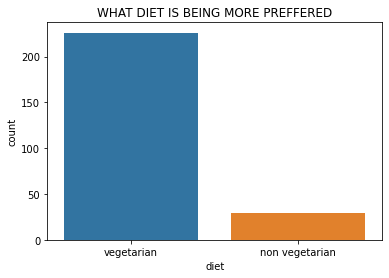

In [39]:
sns.countplot(x["diet"])
plt.title("WHAT DIET IS BEING MORE PREFFERED")
plt.show()

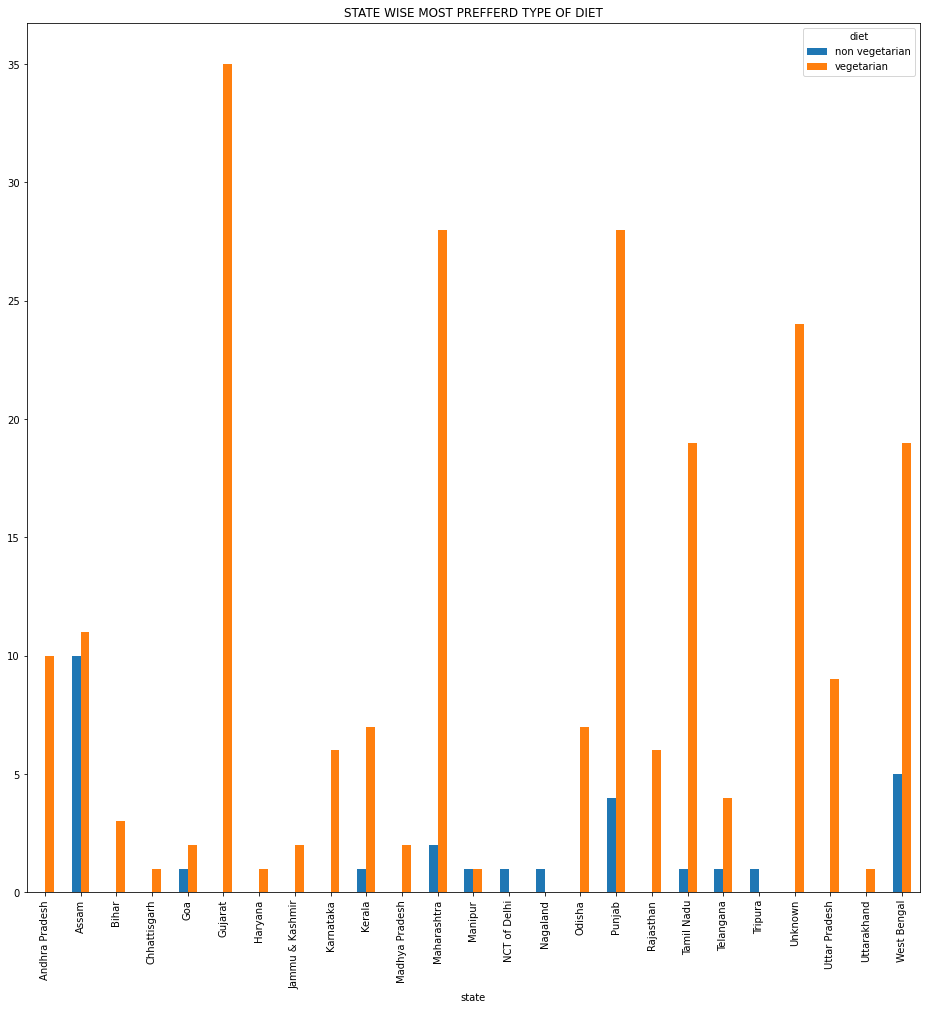

In [40]:
pd.crosstab(x["state"],x["diet"]).plot(kind="bar",figsize=(16,16))
plt.title("STATE WISE MOST PREFFERD TYPE OF DIET")
plt.show()

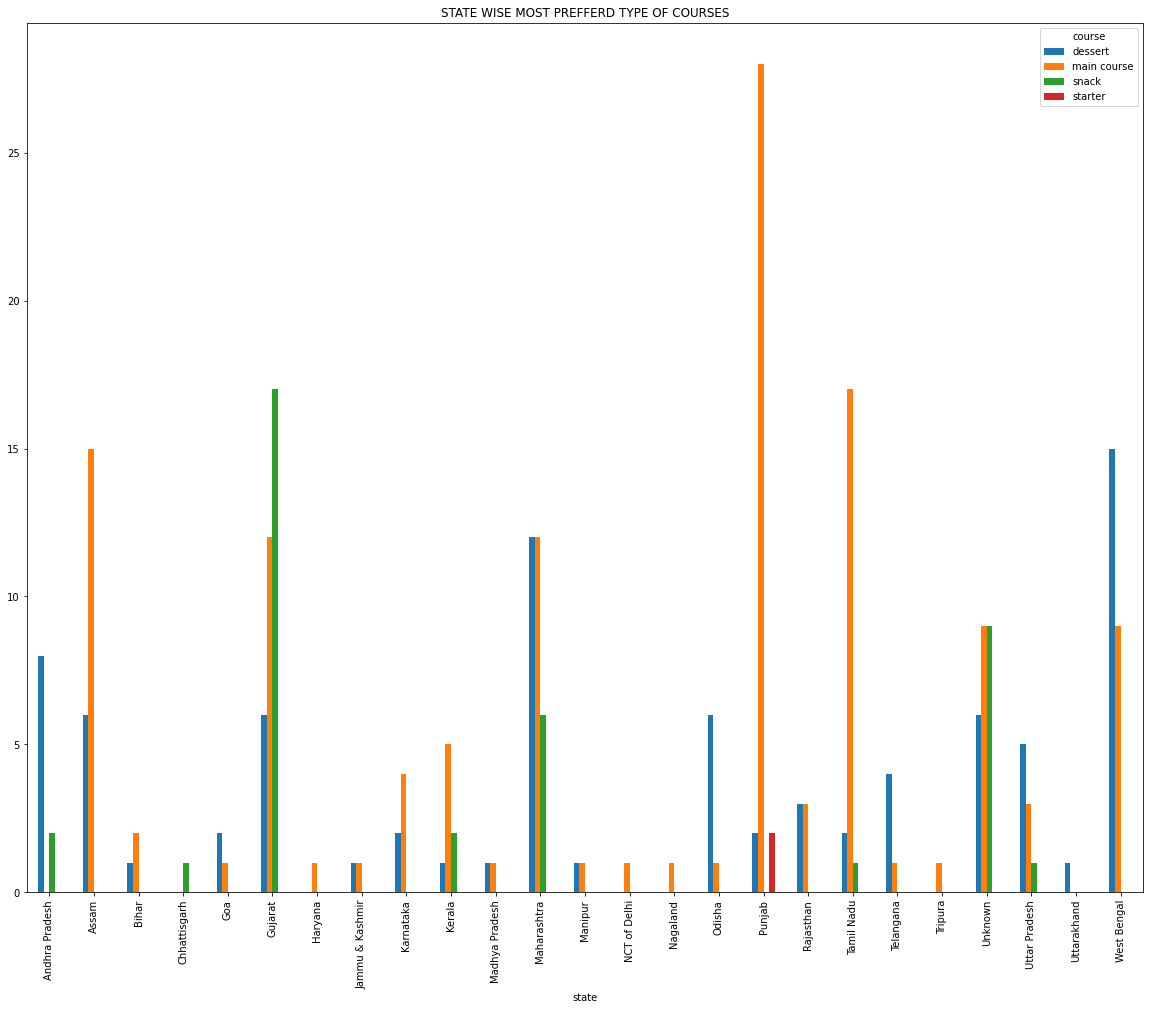

In [41]:
pd.crosstab(x["state"],x["course"]).plot(kind="bar",figsize=(20,16))
plt.title("STATE WISE MOST PREFFERD TYPE OF COURSES")
plt.show()

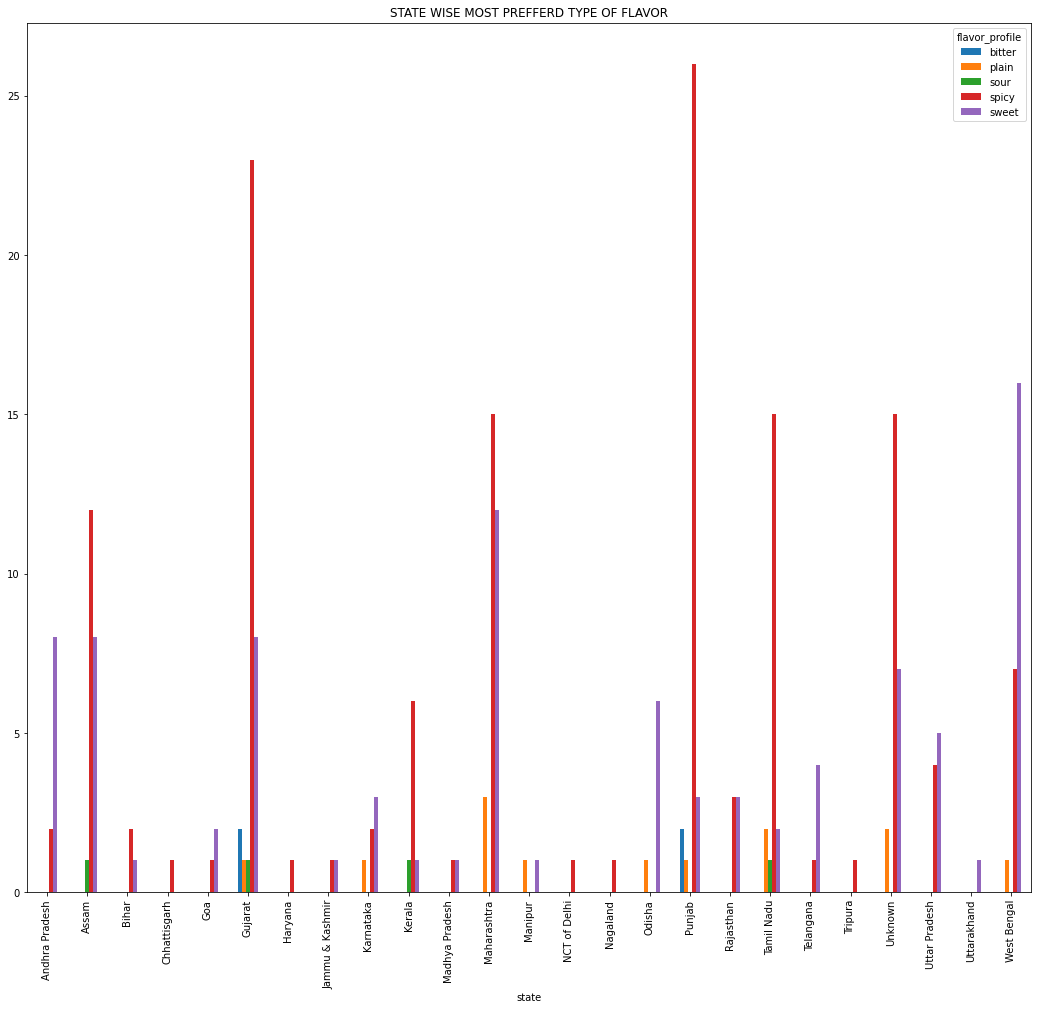

In [42]:
pd.crosstab(x["state"],x["flavor_profile"]).plot(kind="bar",figsize=(18,16))
plt.title("STATE WISE MOST PREFFERD TYPE OF FLAVOR")
plt.show()

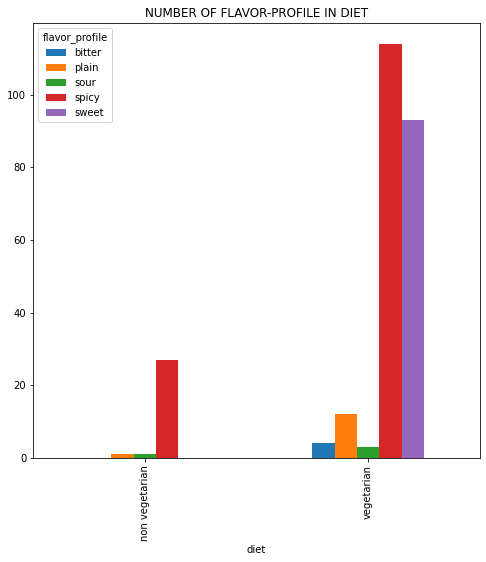

In [43]:
pd.crosstab(x["diet"],x["flavor_profile"]).plot(kind="bar",figsize=(8,8))
plt.title("NUMBER OF FLAVOR-PROFILE IN DIET")
plt.show()

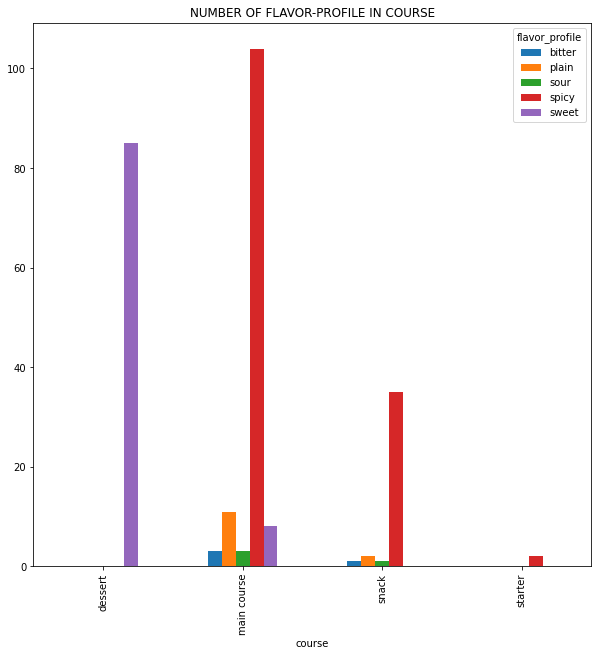

In [44]:
pd.crosstab(x["course"],x["flavor_profile"]).plot(kind="bar",figsize=(10,10))
plt.title("NUMBER OF FLAVOR-PROFILE IN COURSE")
plt.show()

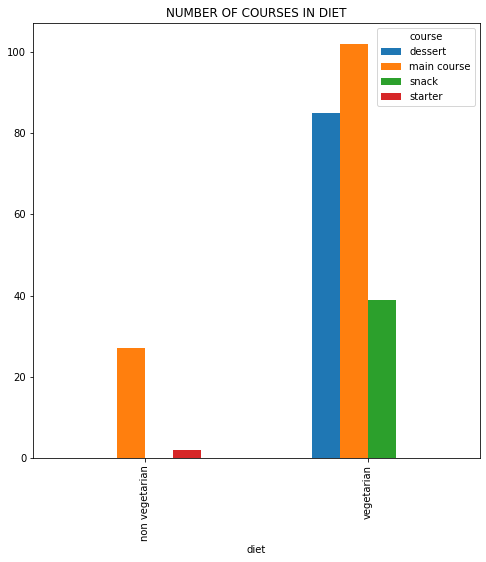

In [45]:
pd.crosstab(x["diet"],x["course"]).plot(kind="bar",figsize=(8,8))
plt.title("NUMBER OF COURSES IN DIET")
plt.show()

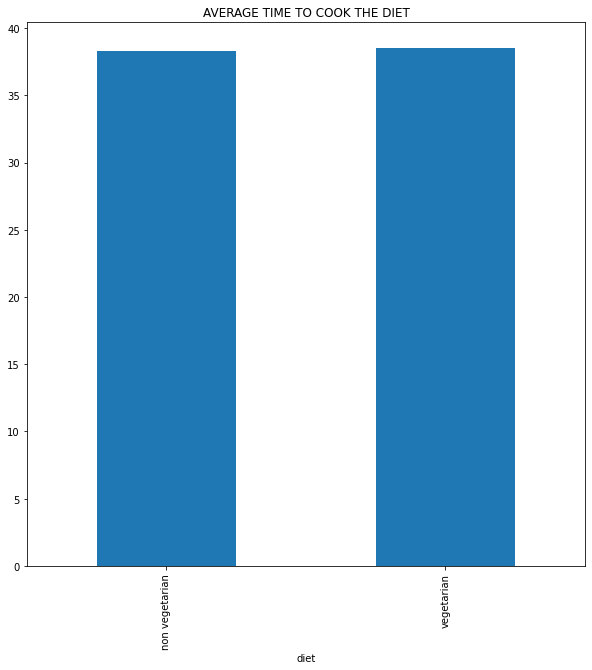

In [46]:
x.groupby(x["diet"])["cook_time"].mean().plot(kind="bar",figsize=(10,10))
plt.title("AVERAGE TIME TO COOK THE DIET")
plt.show()

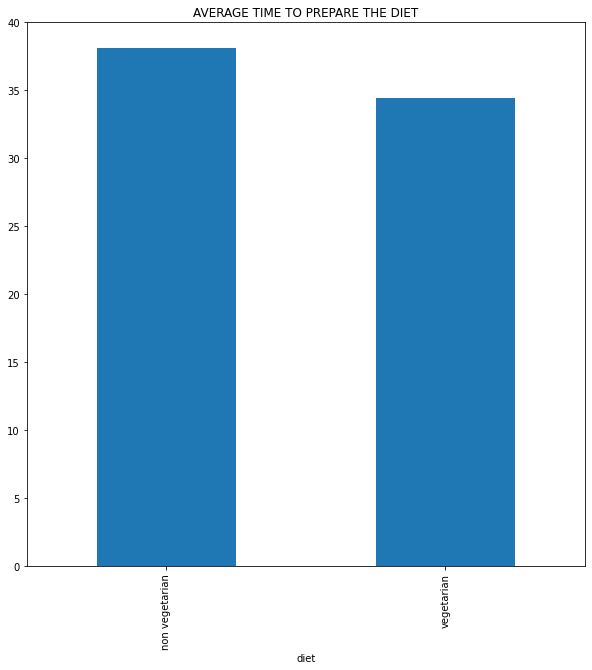

In [47]:
x.groupby(x["diet"])["prep_time"].mean().plot(kind="bar",figsize=(10,10))
plt.title("AVERAGE TIME TO PREPARE THE DIET")
plt.show()

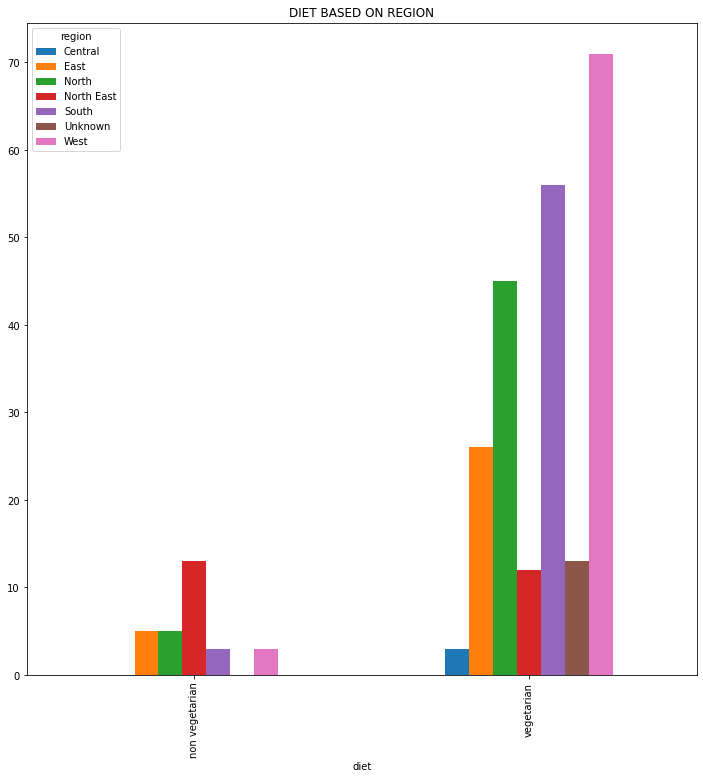

In [48]:
pd.crosstab(x["diet"],x["region"]).plot(kind="bar",figsize=(12,12))
plt.title("DIET BASED ON REGION")
plt.show()

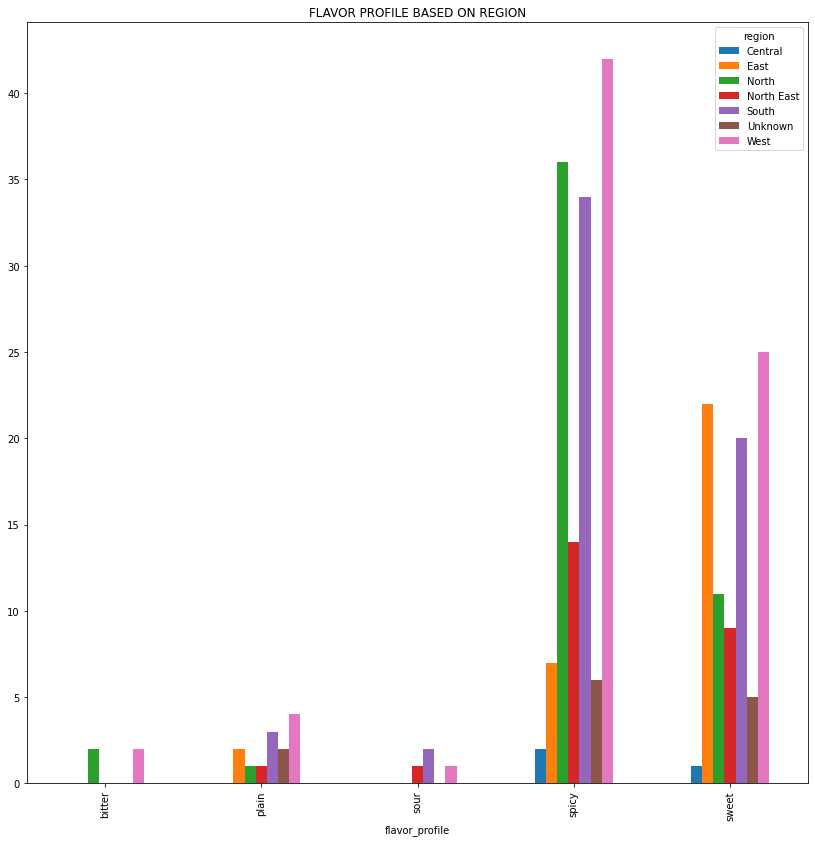

In [49]:
pd.crosstab(x["flavor_profile"],x["region"]).plot(kind="bar",figsize=(14,14))
plt.title("FLAVOR PROFILE BASED ON REGION")
plt.show()

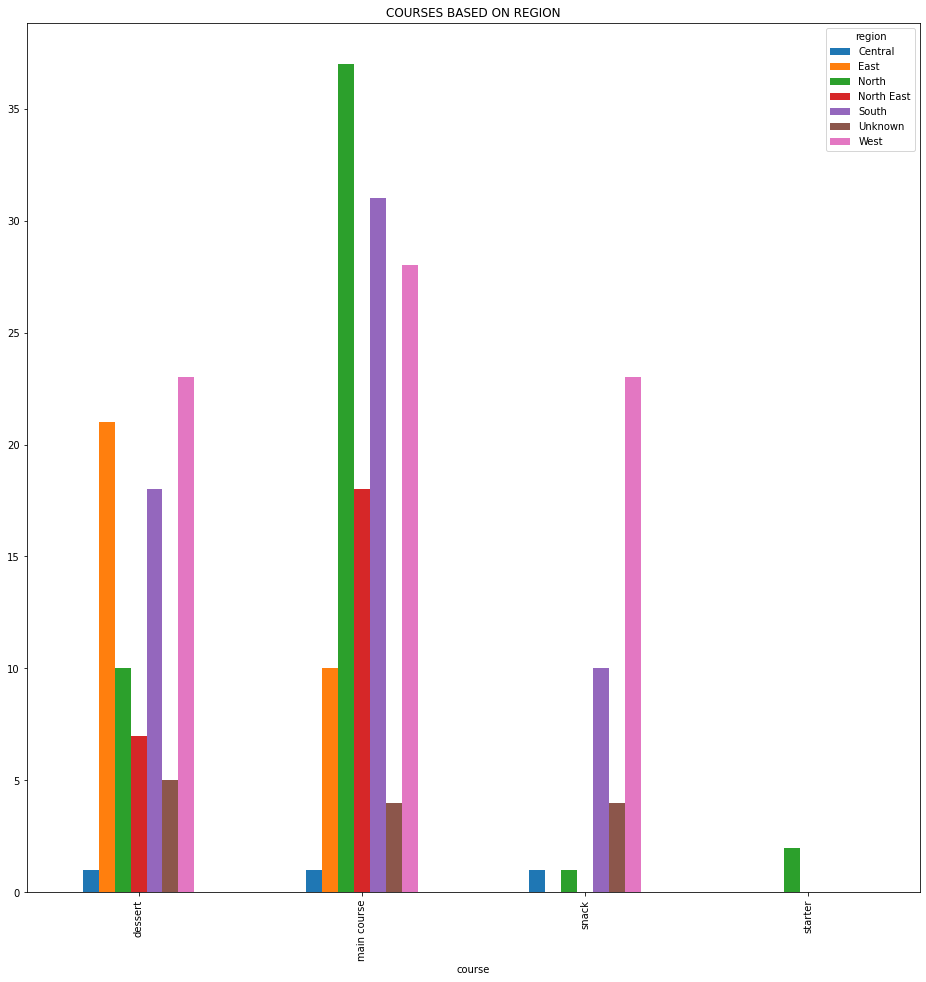

In [50]:
pd.crosstab(x["course"],x["region"]).plot(kind="bar",figsize=(16,16))
plt.title("COURSES BASED ON REGION")
plt.show()